# This notebook is to evaluate different networks

# Table of contents
## <a href='#Evaluation-2:-Evaluate-subnetwork-quality-by-comparing-to-the-whole-network'>2. Evaluate subnetwork by comparing to the whole network</a>
### <a href='#Evaluation-2.1:-does-the-scale-free-network-assumption-still-hold-in-the-subnetwork?'>2.1 Does scale-free assumption still hold in the subnetwork</a>
### <a href='#Evaluation-2.2:-compare-network-distance-by-GED-and-deltacon'>2.2 Compare distance between networks</a>
## <a href='#Evaluation-3:-compare-subnetworks-by-their-communities'>3. Compare subnetwork communities</a>
### <a href='#Evaluation-3.1:-compare-subnetwork-similarities'>3.1 Compare communities of the subnetwork</a>
### <a href='#Evaluation-3.2:-how-do-the-subnetwork-communities-compare-to-the-whole-network-in-terms-of-correlation-with-the-alcohol-phenotypes?'> 3.2 How do the communities compare between whole and subnetworks functionally?</a>

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
from sys import platform 
from src.eda.eda_functions import *
from src.eda.subset_network import *
from src.eda.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
tom_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)

Wall time: 6min 19s


# Evaluation 2: Evaluate subnetwork quality by comparing to the whole network

## Evaluation 2.1: does the scale-free network assumption still hold in the subnetwork?

### Docker Module Subselection

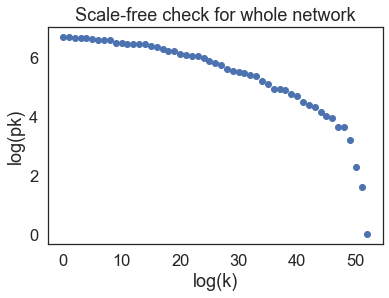

In [14]:
# Original network with no cutoff
scale_free_validate(tom_df, 'whole network')

In [20]:
%%time
# New subselection method. This is the biggest change compared to the other notebook. The EDA methods are the same. Only the subselection method is changed. 
eda_derived_path = prefix +'/Shared drives/NIAAA_ASSIST/Data/eda_derived/'
G0_n_4, module0_n_4_df = get_subnetwork1(0, 100, 0.015, tom_df, plot_hist = False, subnetwork_dir = eda_derived_path+'module0_n_4_df.csv')
G1_n_4, module1_n_4_df = get_subnetwork1(1, 125, 0.01, tom_df, plot_hist = False, subnetwork_dir = eda_derived_path+'module1_n_4_df.csv')
G2_n_4, module2_n_4_df = get_subnetwork1(2, 150, 0.01, tom_df, plot_hist = False, subnetwork_dir = eda_derived_path+'module2_n_4_df.csv')
G3_n_4, module3_n_4_df = get_subnetwork1(3, 150, 0.02, tom_df, plot_hist = False, subnetwork_dir = eda_derived_path+'module3_n_4_df.csv')
G4, module4_df = get_subnetwork2(250, 0.008, tom_df, plot_hist = False, subnetwork_dir = eda_derived_path+'module4_df.csv')

Number of edges: 94166
Number of edges: 82325
Number of edges: 74113
Number of edges: 89152
Number of edges: 82208
Wall time: 3min 43s


In [22]:
%%time
subnetwork_dfs = []
subnetwork_files = ['module0_n_4_df.csv','module1_n_4_df.csv', 'module2_n_4_df.csv', 'module3_n_4_df.csv', 'module4_df.csv']
for file in subnetwork_files:
    df = pd.read_csv(eda_derived_path + file, index_col = 0)
    subnetwork_dfs.append(df)

Wall time: 31.7 s


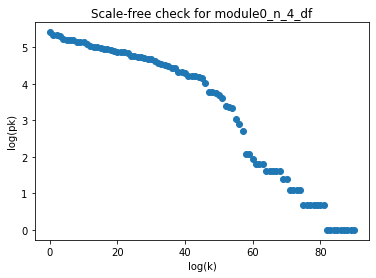

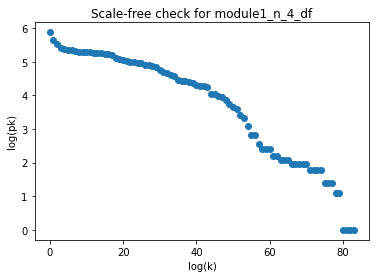

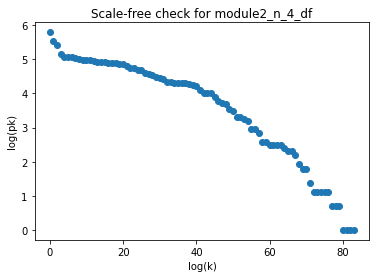

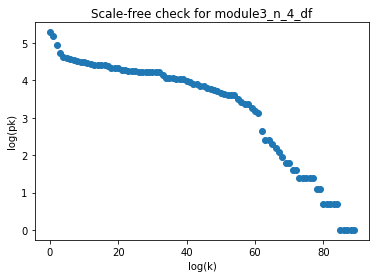

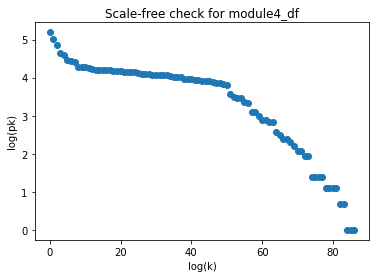

In [24]:
subnetwork_names = [file[:-4] for file in subnetwork_files]
for i, subnetwork in enumerate(subnetwork_dfs):
    scale_free_validate(subnetwork, subnetwork_names[i])

## Evaluation 2.2: compare network distance by GED and deltacon

### Note to use DeltaCon, the graphs need to have the same number of nodes so use subnetwork without removing the nodes with degree = 0

### Docker Module Subselection

In [16]:
# start = time.time()
# subset_networks2 = []
# subset_G = []
# for weight in [0.218, 0.24, 0.278]:
#     subset, G = subset_network(tom_df, weight, 0.98)
#     subset_networks2.append(subset)
#     subset_G.append(G)
# end = time.time()
# delta = end - start
# print(f'time delta: {delta} seconds')

Number of edges left: 10100.0
Number of edges left: 4967.0
Number of edges left: 1092.0
time delta: 74.96587061882019 seconds


In [43]:
%%time
subnetwork_complete_dfs = []
for subnetwork in subnetwork_dfs:
    subnetwork_complete_dfs.append(add_missing_genes(tom_df, subnetwork))

Wall time: 9min 35s


Wall time: 45min 12s


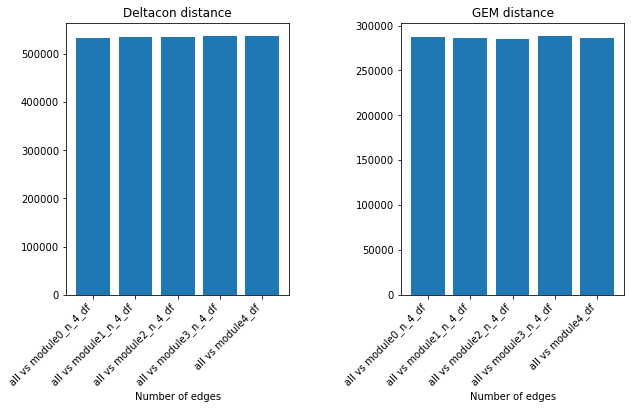

In [48]:
%%time
whole_and_subnetworks = [tom_df] + subnetwork_complete_dfs
plot_graph_distance(whole_and_subnetworks, ['all'] + subnetwork_names)

### Instead of subsetting the network again, I just added the missing genes back to the subnetwork df so the distance from the whole network can be compared

# Evaluation 3: compare subnetworks by their communities

### Docker Module Subselection

## Evaluation 3.1: compare subnetwork similarities

### Evaluation 3.1a: comparison by jaccard

In [132]:
%%time
# run louvain on subnetworks
subset_communities = []
for subset in subnetwork_dfs:
    subset_communities.append(run_louvain(subset, resolution = 0, n_aggregations = 0))

Wall time: 1.99 s


### Evaluation 3.1a: comparison by jaccard (nodes with degree = 0 excluded)

Wall time: 3.64 s


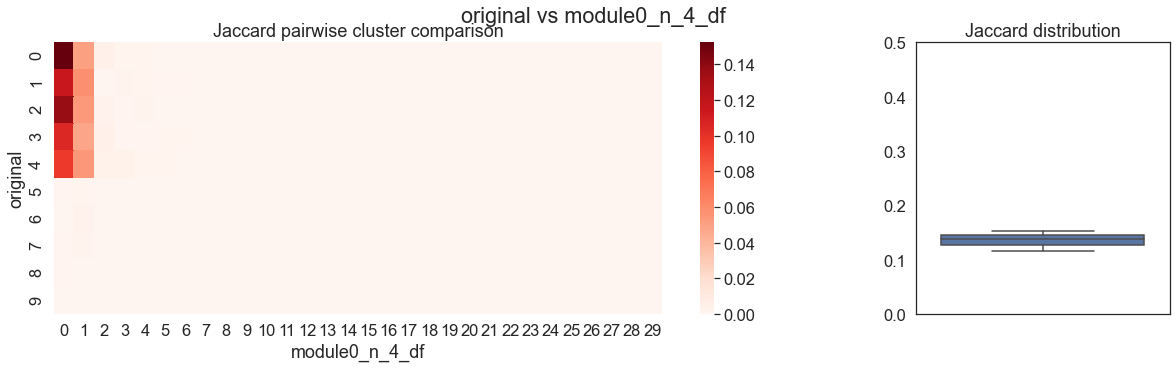

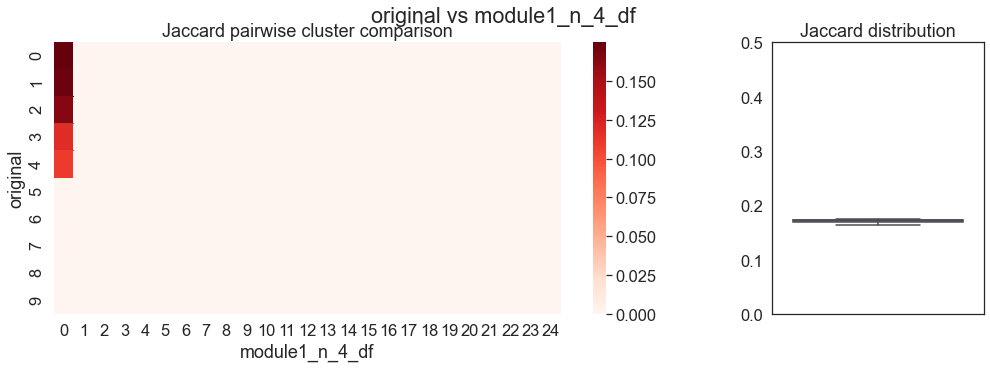

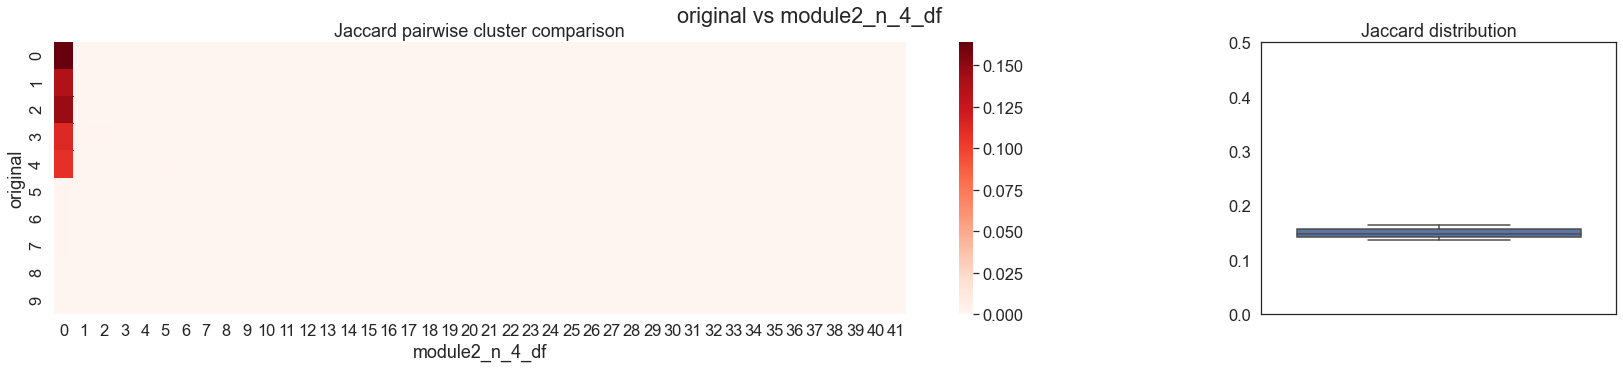

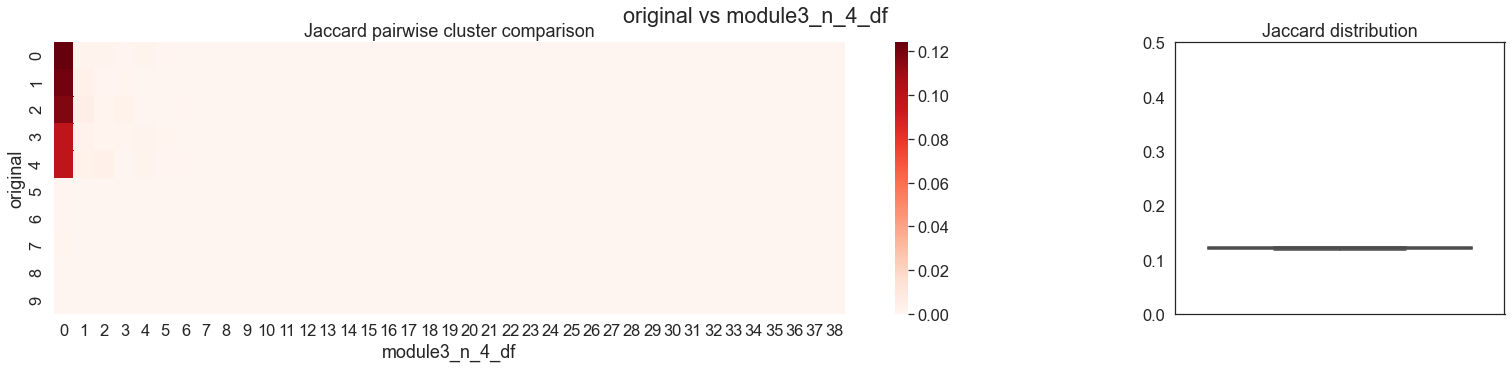

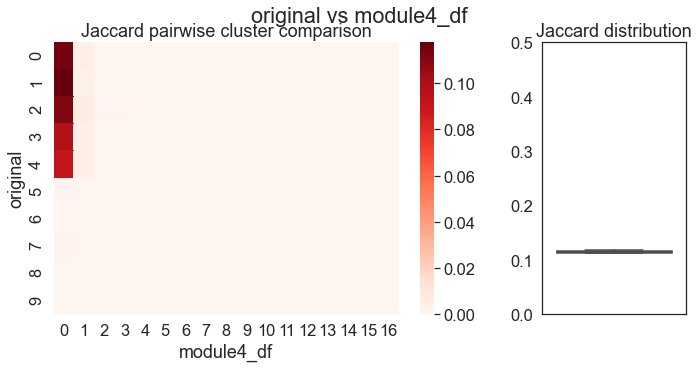

In [133]:
%%time
comm_df1 = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subnetwork_names[i]], cutout_nodes = True, top=3, y_max = 0.5)

### Evaluation 3.1c: comparison of subnetwork by normalized mutual information

### Docker Module Subselection

Wall time: 107 ms


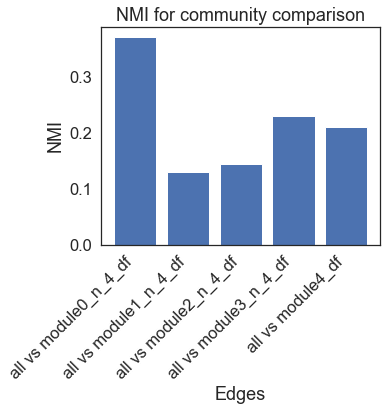

In [134]:
%%time
comparison_names = ['all vs ' + name for name in subnetwork_names]
plot_cluster_nmi_comparison(comm_df1, subset_communities, 
                            'louvain_label', comparison_names)

## Evaluation 3.2: how do the subnetwork communities compare to the whole network in terms of correlation with the alcohol phenotypes?

### Evaluation 3.2a: compare whole network and subnetwork communities by % DE in each community

### Docker Module Subselection

Wall time: 3.3 s


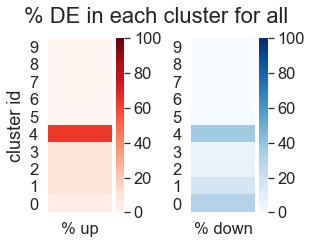

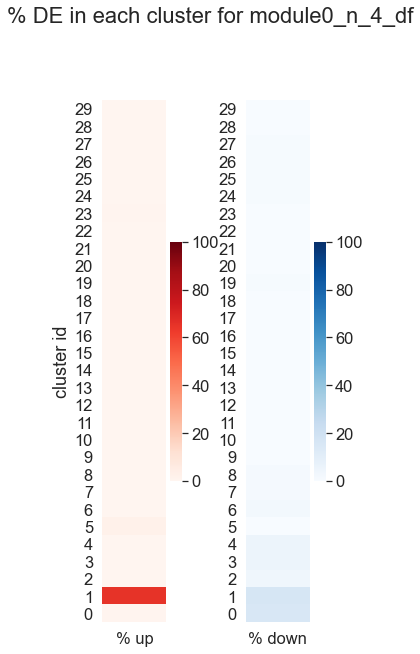

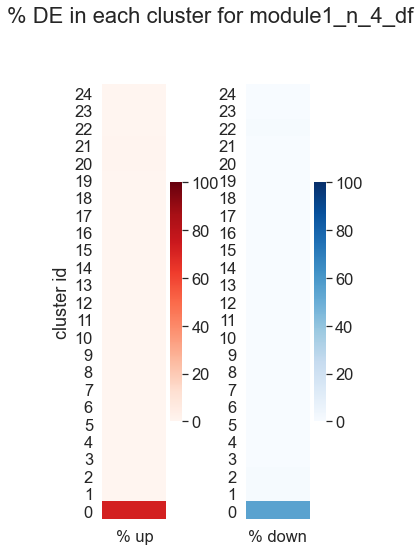

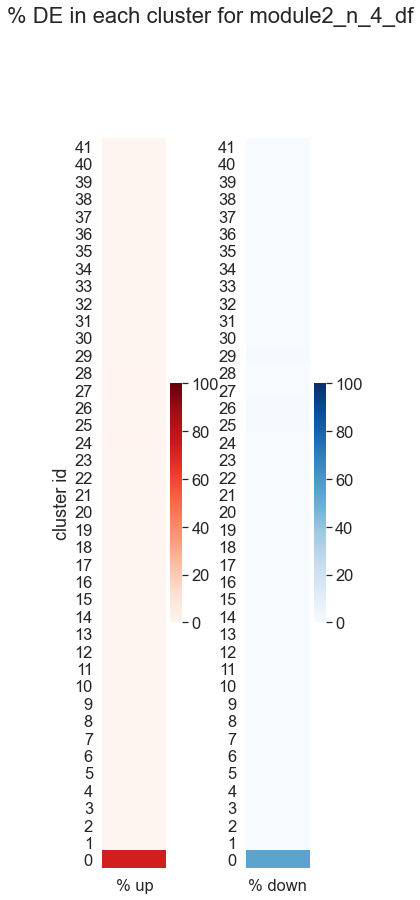

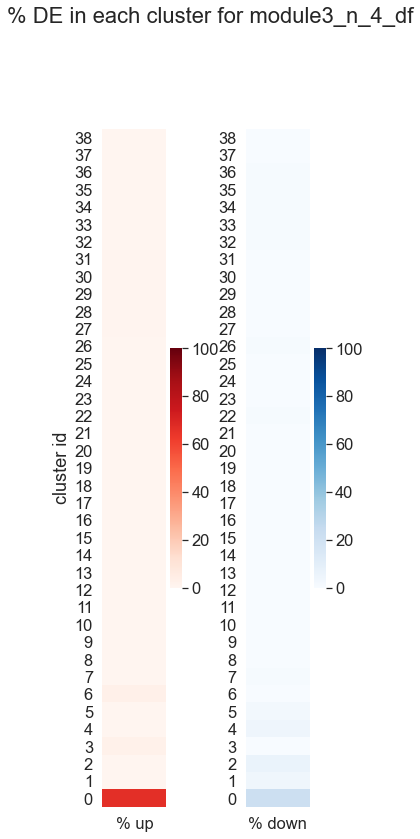

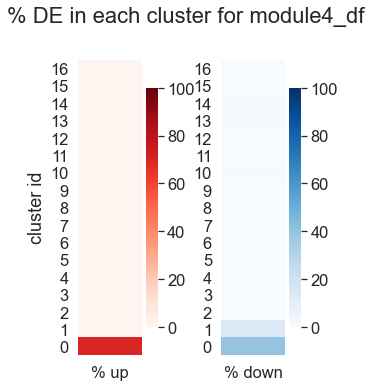

In [135]:
%%time
all_network_names = ['all'] + subnetwork_names
all_communities = [comm_df1] + subset_communities
for i, cluster_df in enumerate(all_communities):
    cluster_DE_perc(cluster_df, 'louvain_label', all_network_names[i])

### Evaluation 3.2b: compare whole network and subnetwork communities by % significant genes in each cluster

### Docker Module Subselection

In [65]:
expression_meta_df = pd.read_csv(eda_derived_path + 'expression_meta.csv', low_memory = False)

Wall time: 16min 50s


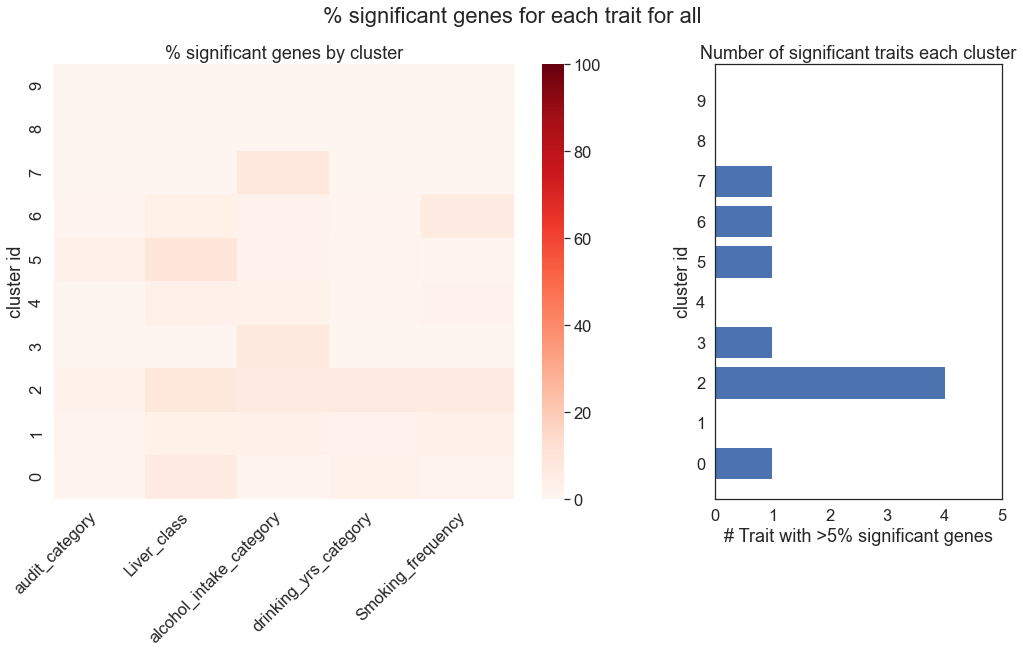

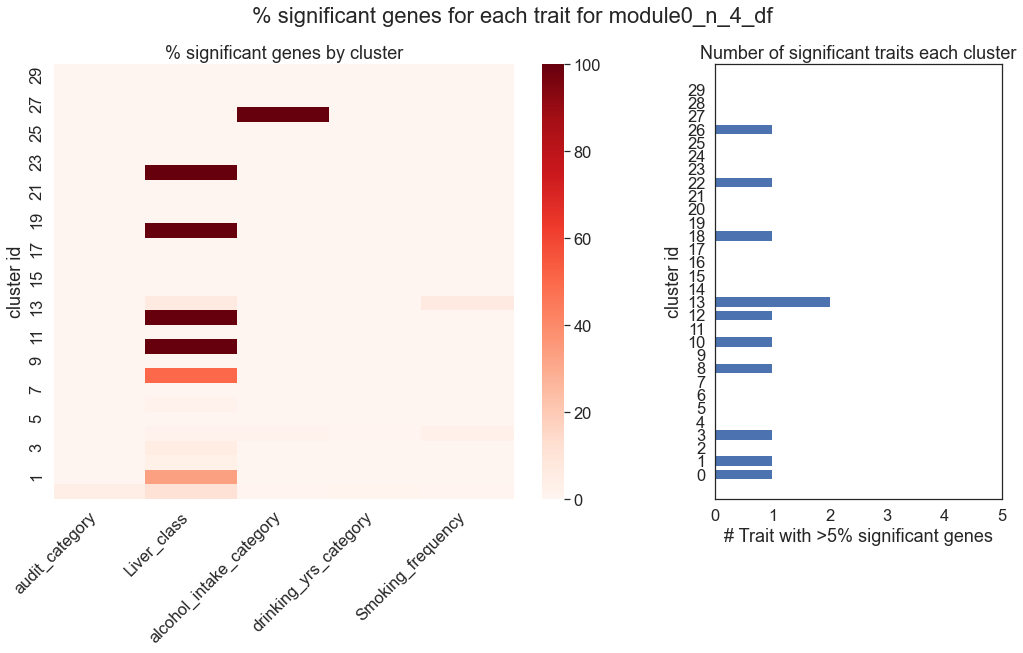

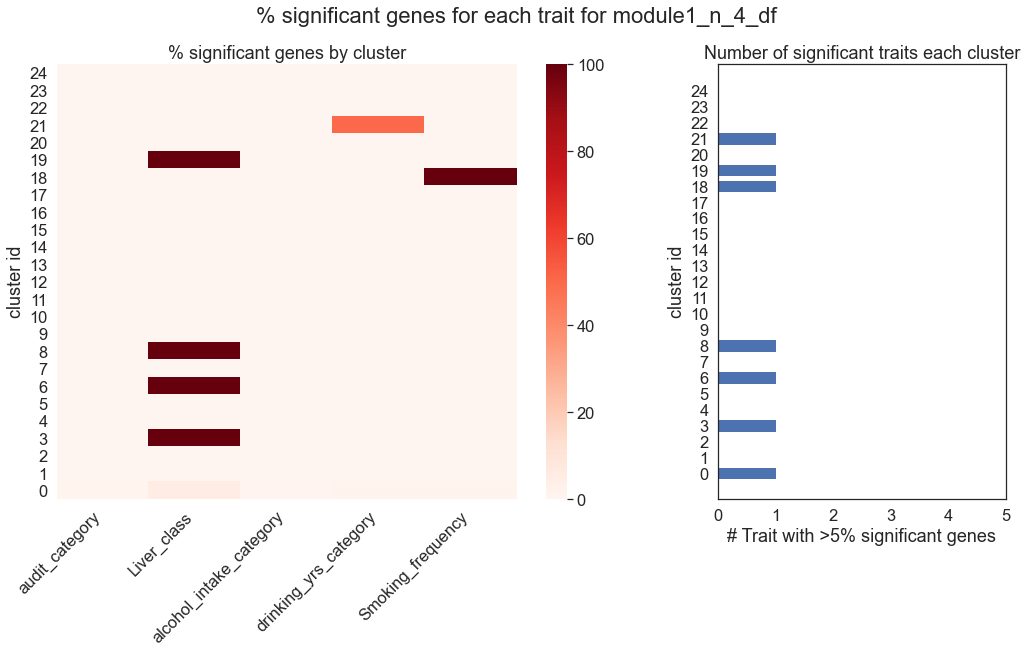

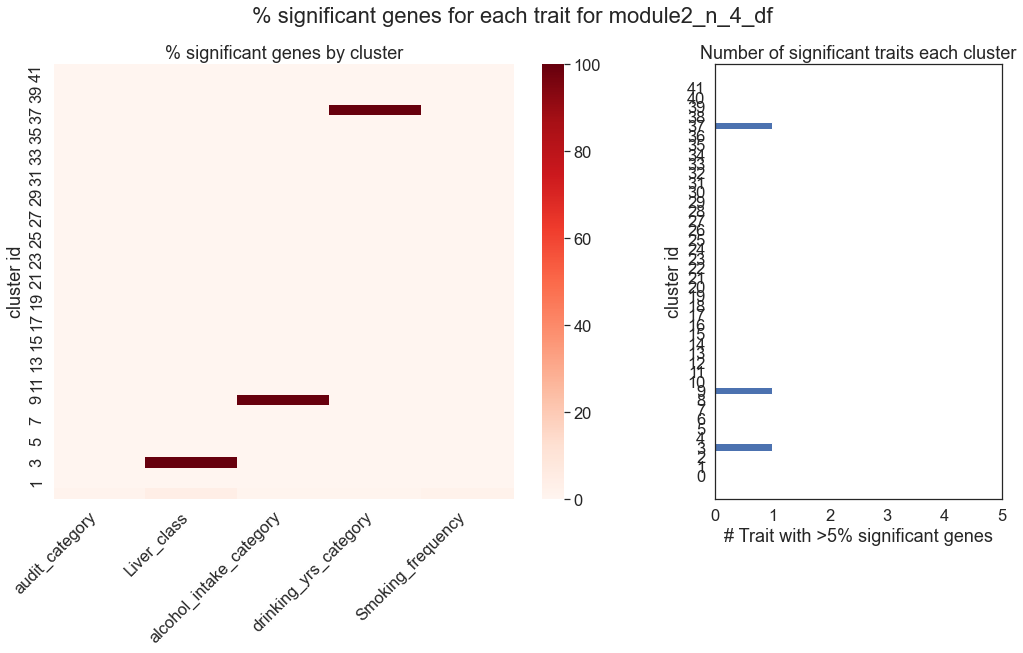

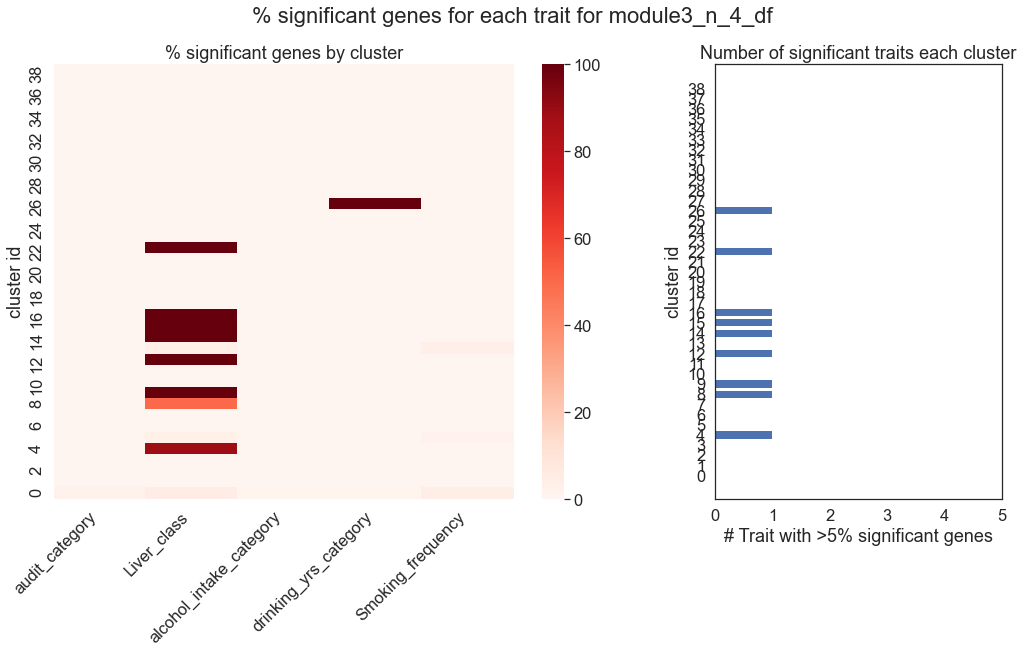

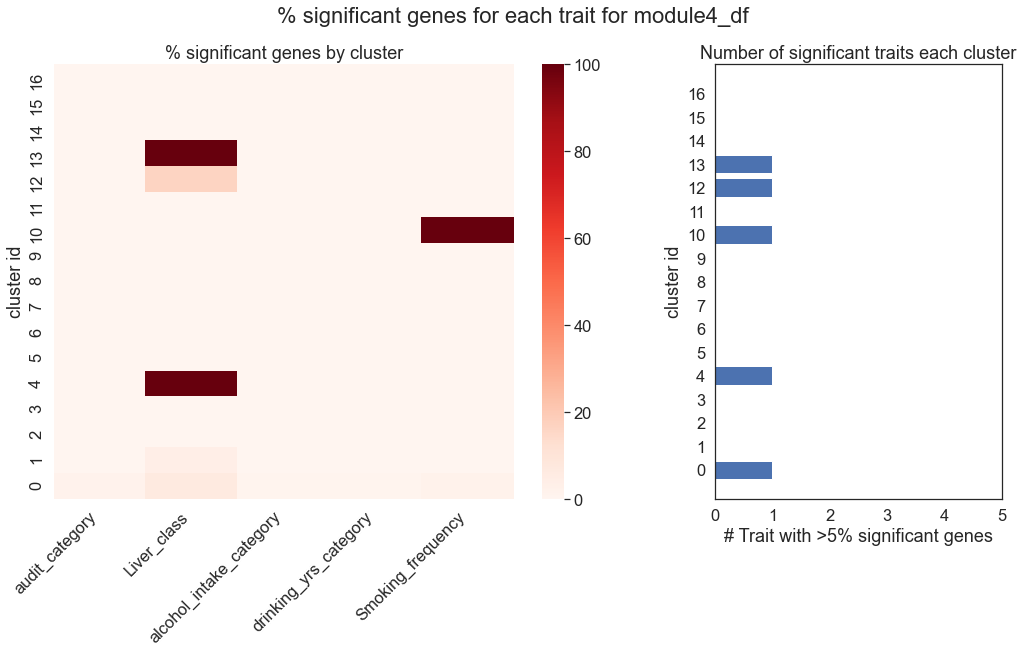

In [137]:
%%time
for i, cluster_df in enumerate(all_communities):
    plot_sig_perc(cluster_df, 'louvain_label', all_network_names[i], expression_meta_df)

### Evaluation 3.2c: compare whole network and subnetwork communities by cluster and trait correlation

### Docker Module Subselection

Wall time: 18.3 s


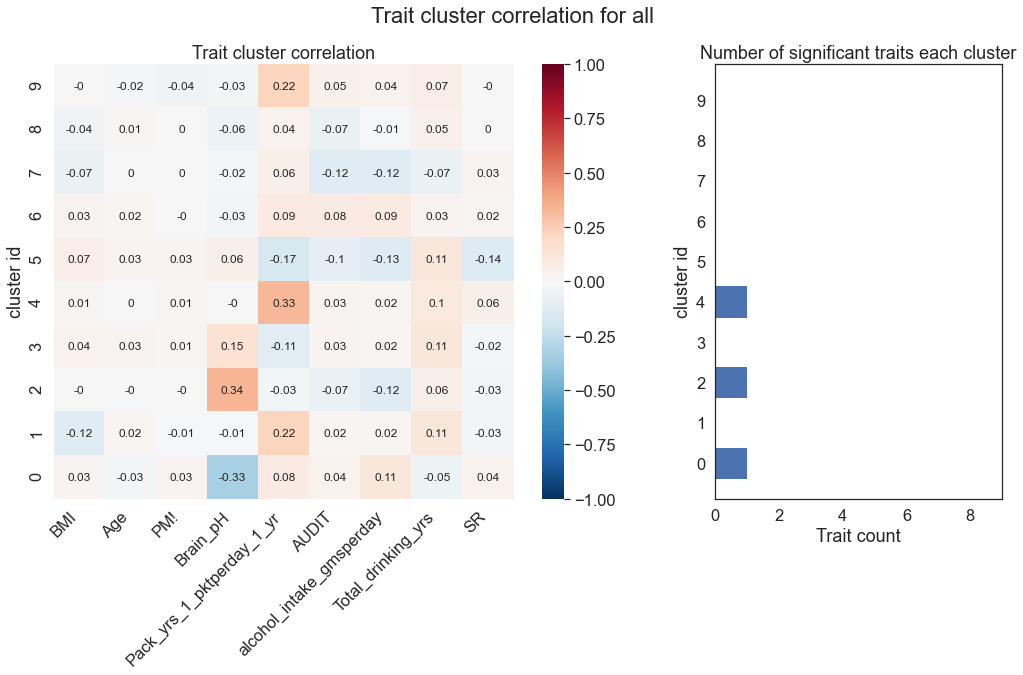

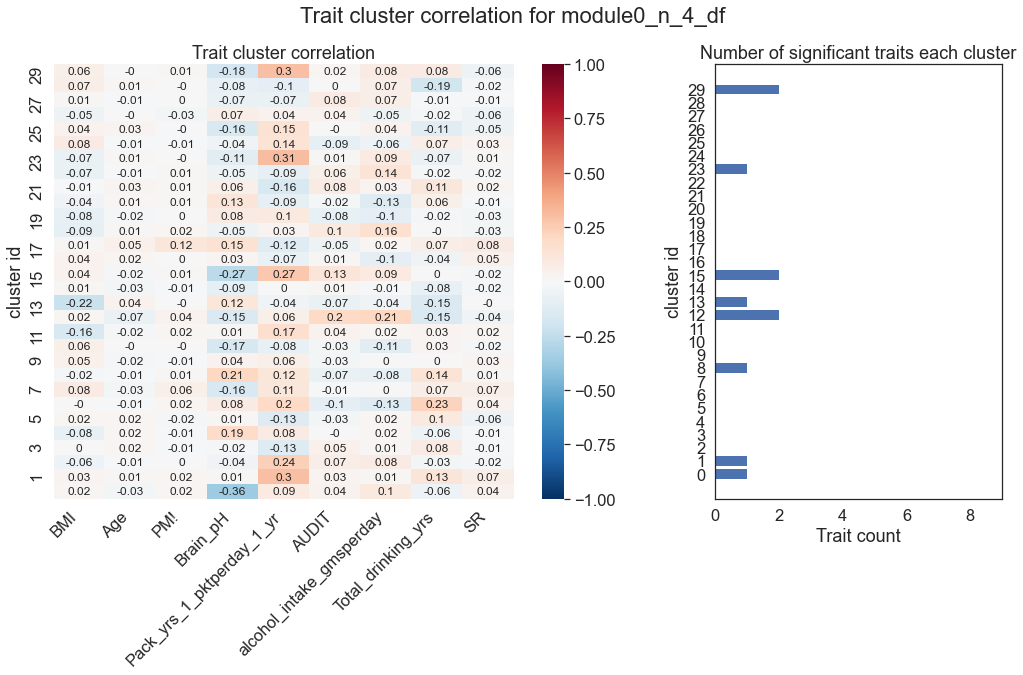

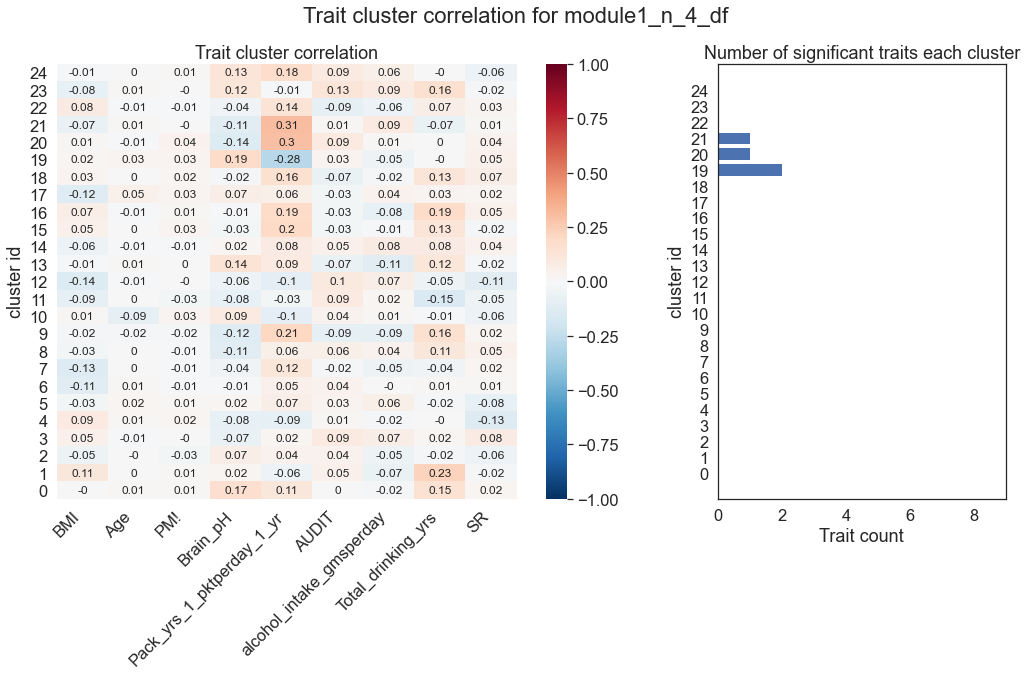

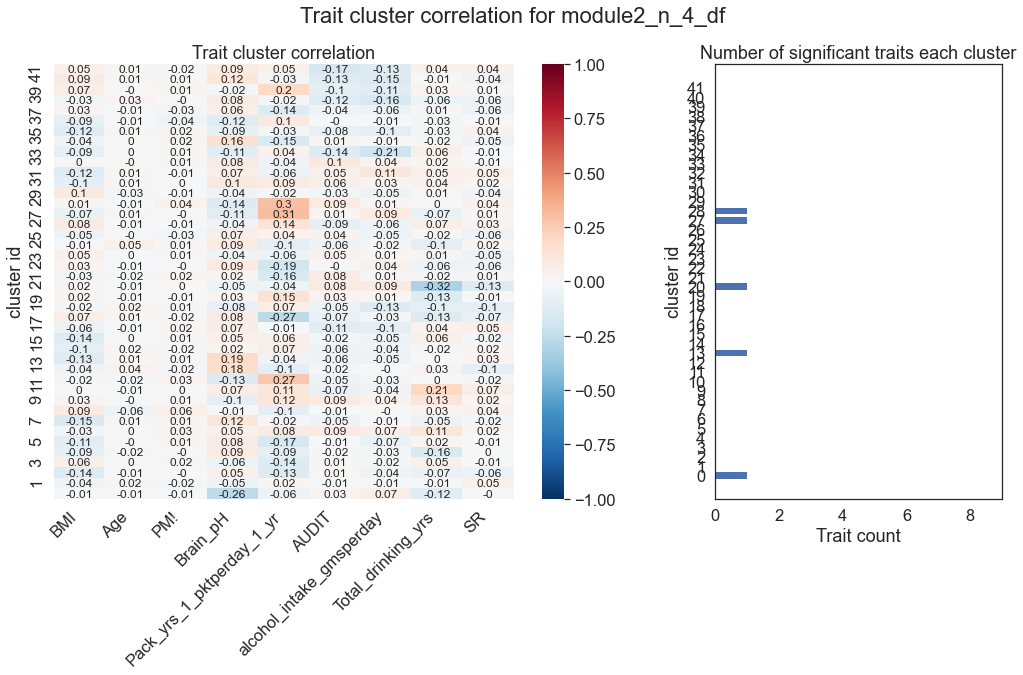

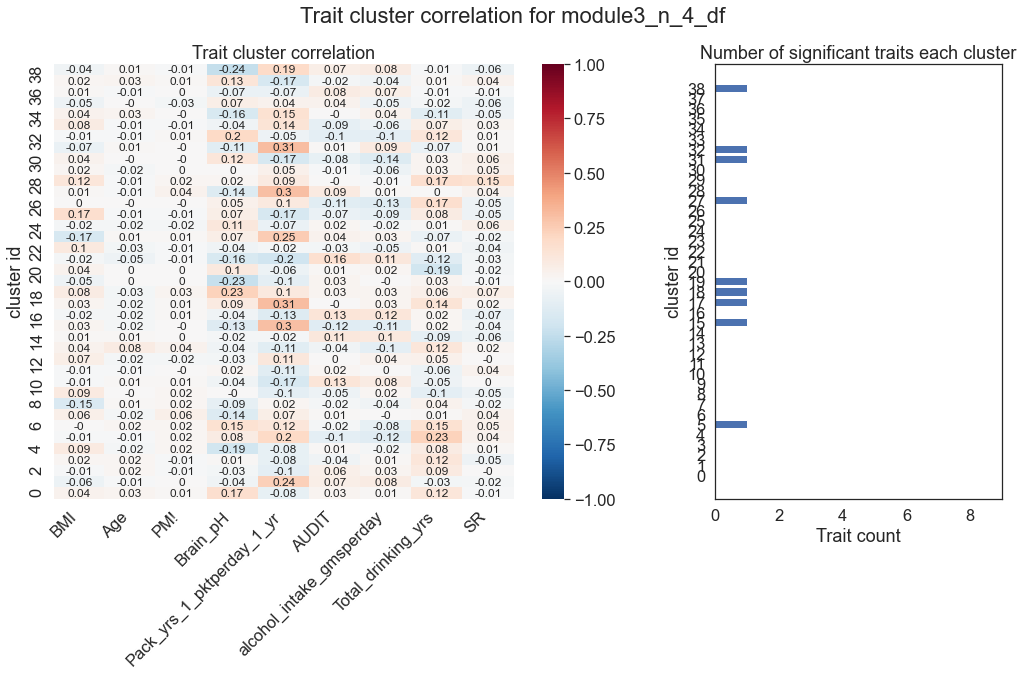

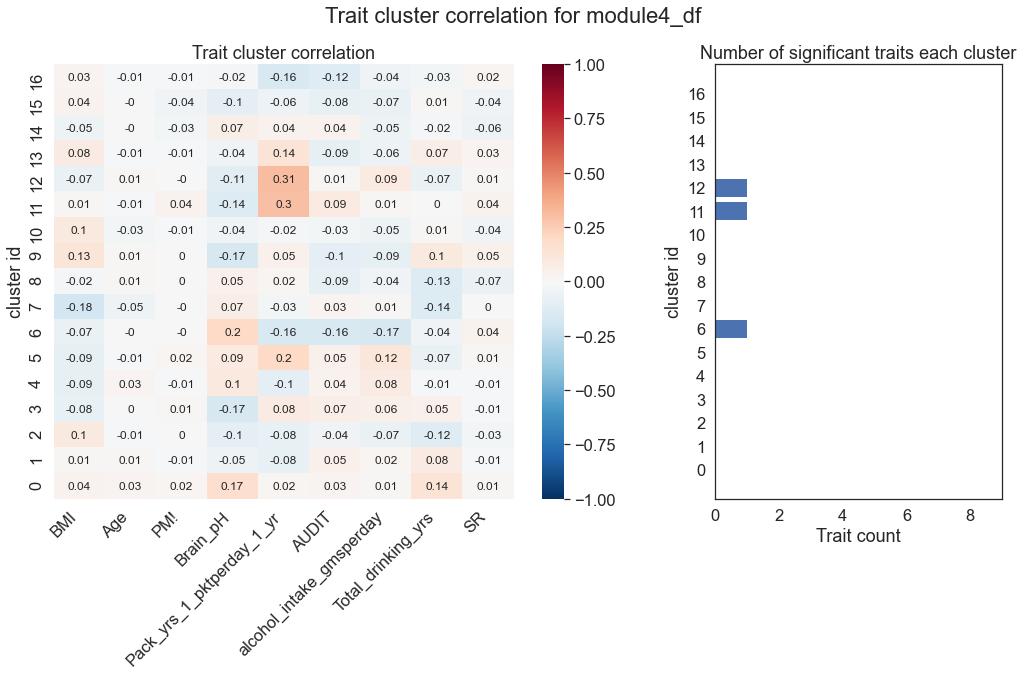

In [136]:
%%time
for i, cluster_df in enumerate(all_communities):
    cluster_phenotype_corr(cluster_df, 'louvain_label', all_network_names[i], expression_meta_df)